In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
heartdf = pd.read_csv("A1_heart_disease_dataset.csv")

In [3]:
heartdf.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
0,63.0,M,tap,145.0,233.0,yes,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,M,asp,160.0,286.0,no,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,M,asp,120.0,229.0,no,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,M,nap,130.0,250.0,no,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,F,aap,130.0,204.0,no,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [4]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       295 non-null    float64
 1   sex       295 non-null    object 
 2   cp        292 non-null    object 
 3   trestbps  295 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       295 non-null    object 
 6   restecg   295 non-null    float64
 7   thalach   291 non-null    float64
 8   exang     295 non-null    float64
 9   oldpeak   295 non-null    float64
 10  slope     295 non-null    float64
 11  ca        291 non-null    float64
 12  thal      295 non-null    float64
 13  state     293 non-null    float64
dtypes: float64(11), object(3)
memory usage: 33.3+ KB


### 1. Load the data from supplied data file. Remove the observations/samples where the heart diseases are not diagnosed by the Cardiologists. Print the data dimension before and after removing the observations/samples.

In [5]:
#data dimension prior to removing obeservations not diagnosed by cardiologist

print("The number of columns is "+ str(len(heartdf.columns)))

print("The number of observations is "+ str(len(heartdf)))


The number of columns is 14
The number of observations is 303


In [6]:
#create new df to remove observations not diagnosed by cardiologist

heartdf2 = heartdf[heartdf['state']>= 0.0]

In [7]:
heartdf2 = heartdf2.reset_index(drop=True)

In [8]:
heartdf2.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
0,63.0,M,tap,145.0,233.0,yes,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,M,asp,160.0,286.0,no,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,M,asp,120.0,229.0,no,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,M,nap,130.0,250.0,no,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,F,aap,130.0,204.0,no,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [9]:
#data dimension after to removing obeservations not diagnosed by cardiologist
print("The number of columns is "+ str(len(heartdf2.columns)))

print("The number of observations is "+ str(len(heartdf2)))

The number of columns is 14
The number of observations is 293


### 2. Continue from question 1. Display the number of rows and their indices that have missing data in one or more cells. Now, replace the missing data by the lowest value of the corresponding feature if it is a continuous variable. In case of categorical variable, remove the sample. Print the median values of all features before and after replacing missing data.

In [10]:
#first check all features for unique values
print(heartdf2.apply(lambda col: col.unique()))

age         [63.0, 67.0, 37.0, 41.0, 56.0, 62.0, 57.0, 53....
sex                                                    [M, F]
cp                                  [tap, asp, nap, aap, nan]
trestbps    [145.0, 160.0, 120.0, 130.0, 140.0, 172.0, 150...
chol        [233.0, 286.0, 229.0, 250.0, 204.0, 236.0, 268...
fbs                                                 [yes, no]
restecg                                       [2.0, 0.0, 1.0]
thalach     [150.0, 108.0, 129.0, 187.0, 172.0, 178.0, 160...
exang                                              [0.0, 1.0]
oldpeak     [2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, ...
slope                                         [3.0, 2.0, 1.0]
ca                                  [0.0, 3.0, 2.0, 1.0, nan]
thal                                     [6.0, 3.0, 7.0, 0.0]
state                               [0.0, 2.0, 1.0, 3.0, 4.0]
dtype: object


In [11]:
heartdf2["thal"].replace({0:np.nan}, inplace= True) #replace 0 in thal as this needs to be either 3, 6, 7

In [12]:
#Identify features with missing values
print(heartdf2.isnull().sum())

age         0
sex         0
cp          3
trestbps    0
chol        2
fbs         0
restecg     0
thalach     4
exang       0
oldpeak     0
slope       0
ca          3
thal        2
state       0
dtype: int64


In [13]:
#display rows that have got missing values
heartdf2[heartdf2.isnull().any(axis=1)] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
6,62.0,F,NaN,140.0,268.0,no,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3.0
84,53.0,F,nap,128.0,216.0,no,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0.0
111,41.0,M,NaN,135.0,NaN,no,0.0,NaN,0.0,0.0,2.0,NaN,6.0,0.0
112,58.0,M,nap,140.0,211.0,yes,2.0,NaN,0.0,0.0,1.0,0.0,3.0,0.0
128,29.0,M,NaN,130.0,204.0,no,2.0,202.0,0.0,0.0,1.0,0.0,3.0,0.0
209,64.0,F,asp,130.0,303.0,no,0.0,NaN,0.0,2.0,2.0,2.0,3.0,0.0
214,53.0,M,asp,123.0,282.0,no,0.0,95.0,1.0,2.0,2.0,NaN,7.0,3.0
219,54.0,M,asp,110.0,NaN,no,2.0,108.0,1.0,0.0,2.0,1.0,3.0,3.0
257,52.0,M,asp,128.0,204.0,yes,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2.0
281,67.0,M,nap,152.0,212.0,no,2.0,NaN,0.0,0.8,2.0,0.0,7.0,1.0


In [14]:
#Median before replacing missing values
print("Feature Median Before Replacing Missing Value")
heartdf2.median(axis=None, skipna=None)

Feature Median Before Replacing Missing Value


age          55.0
trestbps    130.0
chol        243.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.7
slope         2.0
ca            0.0
thal          3.0
state         0.0
dtype: float64

In [15]:
#dropping rows with missing values in cp, ca & thal as these are considered categorical variables
heartdf2 = heartdf2.dropna(subset=['cp', 'ca', 'thal'])


In [16]:
heartdf2 = heartdf2.reset_index(drop=True)

In [17]:
heartdf2[heartdf2.isnull().any(axis=1)] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
109,58.0,M,nap,140.0,211.0,yes,2.0,NaN,0.0,0.0,1.0,0.0,3.0,0.0
205,64.0,F,asp,130.0,303.0,no,0.0,NaN,0.0,2.0,2.0,2.0,3.0,0.0
214,54.0,M,asp,110.0,NaN,no,2.0,108.0,1.0,0.0,2.0,1.0,3.0,3.0
275,67.0,M,nap,152.0,212.0,no,2.0,NaN,0.0,0.8,2.0,0.0,7.0,1.0


In [18]:
#replacing NA in chol and thalach with lowest value as these are continuos variables
heartdf2['chol'].fillna(value=heartdf2['chol'].min(), inplace=True)
heartdf2['thalach'].fillna(value=heartdf2['thalach'].min(), inplace=True)

In [19]:
#Median after replacing missing values
print("Feature Median After Replacing Missing Values")
heartdf2.median(axis=None, skipna=None)

Feature Median After Replacing Missing Values


age          56.00
trestbps    130.00
chol        243.00
restecg       1.00
thalach     152.00
exang         0.00
oldpeak       0.75
slope         2.00
ca            0.00
thal          3.00
state         0.00
dtype: float64

### 3. Continue from question 2. Is there any change in data type? If yes, convert them back to appropriate data types. Print all variables with corresponding data type.

In [20]:
#check data types
heartdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       286 non-null    float64
 1   sex       286 non-null    object 
 2   cp        286 non-null    object 
 3   trestbps  286 non-null    float64
 4   chol      286 non-null    float64
 5   fbs       286 non-null    object 
 6   restecg   286 non-null    float64
 7   thalach   286 non-null    float64
 8   exang     286 non-null    float64
 9   oldpeak   286 non-null    float64
 10  slope     286 non-null    float64
 11  ca        286 non-null    float64
 12  thal      286 non-null    float64
 13  state     286 non-null    float64
dtypes: float64(11), object(3)
memory usage: 31.4+ KB


In [21]:
#function to identify data types class - need to use before and after changing data type
def df_dtype(heartdf2): 
    return {col: heartdf2[col].apply(lambda x: type(x)).unique().tolist() for col in heartdf2.columns}

df_types = df_dtype(heartdf2)
print(df_types)




{'age': [<class 'float'>], 'sex': [<class 'str'>], 'cp': [<class 'str'>], 'trestbps': [<class 'float'>], 'chol': [<class 'float'>], 'fbs': [<class 'str'>], 'restecg': [<class 'float'>], 'thalach': [<class 'float'>], 'exang': [<class 'float'>], 'oldpeak': [<class 'float'>], 'slope': [<class 'float'>], 'ca': [<class 'float'>], 'thal': [<class 'float'>], 'state': [<class 'float'>]}


In [22]:
#age, restecg exang, ca, thal & state are integers in the datafile, so change from float to integer

cols = ['age','restecg', 'exang', 'slope','ca', 'thal', 'state' ]
for col in cols:
    heartdf2[col] =heartdf2[col].apply(lambda x: int(x) if x == x else "")
   

In [23]:
df_types = df_dtype(heartdf2)
print(df_types)

{'age': [<class 'int'>], 'sex': [<class 'str'>], 'cp': [<class 'str'>], 'trestbps': [<class 'float'>], 'chol': [<class 'float'>], 'fbs': [<class 'str'>], 'restecg': [<class 'int'>], 'thalach': [<class 'float'>], 'exang': [<class 'int'>], 'oldpeak': [<class 'float'>], 'slope': [<class 'int'>], 'ca': [<class 'int'>], 'thal': [<class 'int'>], 'state': [<class 'int'>]}


In [24]:
heartdf2.info() #print variables with data type after conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       286 non-null    int64  
 1   sex       286 non-null    object 
 2   cp        286 non-null    object 
 3   trestbps  286 non-null    float64
 4   chol      286 non-null    float64
 5   fbs       286 non-null    object 
 6   restecg   286 non-null    int64  
 7   thalach   286 non-null    float64
 8   exang     286 non-null    int64  
 9   oldpeak   286 non-null    float64
 10  slope     286 non-null    int64  
 11  ca        286 non-null    int64  
 12  thal      286 non-null    int64  
 13  state     286 non-null    int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 31.4+ KB


### 4. Continue from question 3. Print the total numbers and ration of male and female patients who are at highest risk of heart disease

In [25]:
#any observations where state is 4, I've considered as highest risk
sexdf = pd.pivot_table(heartdf2[heartdf2.state == 4], columns = 'sex', aggfunc={"state":len})


In [26]:
f = sexdf['F'].sum()
f

2

In [27]:
m = sexdf['M'].sum()
m

11

In [28]:
Female = f
Male = m

Female_Ration = round((Female/(Female + Male))*100,2)
Male_Ration = round((Male/(Female + Male))*100,2)

print("the number of females at high risk is " + str(Female))
print("the ration of females at high risk is " + str(Female_Ration)+"%")
print(" ")
print("the number of males at high risk is " + str(Male))
print("the ration of males at high risk is " + str(Male_Ration)+"%")

the number of females at high risk is 2
the ration of females at high risk is 15.38%
 
the number of males at high risk is 11
the ration of males at high risk is 84.62%


### 5. Continue from question 3. Is there any association between heart rate and severity of heart disease? Explain your results from given dataset.

In [29]:
#calculate correlation between thalach & thal

thalach = heartdf2['thalach']
state = heartdf2['state']
correlation = thalach.corr(state)
correlation

-0.37566675636012486

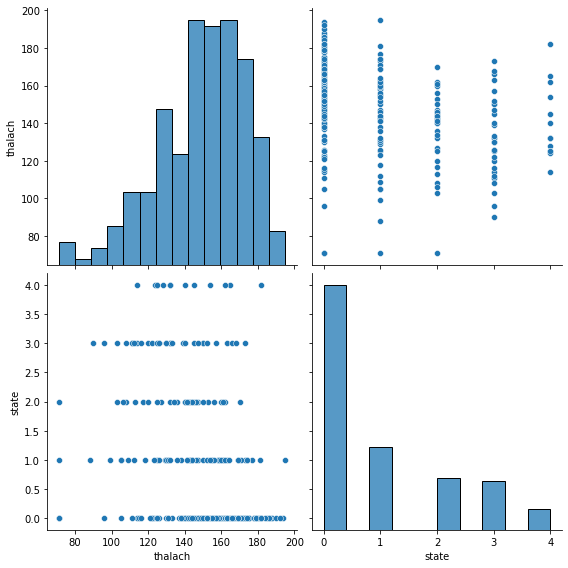

In [30]:
sev = heartdf2[['thalach', 'state']]
sns.pairplot(sev, kind="scatter",height=4, aspect=4/4)
plt.show()

From the correlation result of -0.37, we can confidently say there is no strong relationship between the heart rate and severity of the heart disease. This can also be viewed when the data for these 2 features are visualised, there is no identifiable relationship in the scatter plots.

### 6. Continue from question 3. Print the average cholesterol level for different number of blocked blood vessels across gender. Please report the pattern found in the result, if any.

In [31]:
chol = heartdf2.groupby(['ca', 'sex'], as_index = True).chol.mean()
print(chol)

ca  sex
0   F      256.587302
    M      236.149533
1   F      271.785714
    M      241.312500
2   F      275.454545
    M      244.208333
3   F      272.500000
    M      264.866667
Name: chol, dtype: float64


Overall Females has a higher average cholestrol levels compared to males. With males, the cholestrol level is similar when there is 2 or less blocked vessels, and there is a big increase in cholestrol levels when there are 3 blocked vessels, this is the opposite for females where the cholestrol level drops a little when there are 3 blocked vessels, but from 0-2 there is an increase.

### 7. Print the percentage of patients at risk of heart disease having abnormality in both ECG and blood sugar with asymptomatic chest pain.

In [32]:
x = len(heartdf2)
x

286

In [33]:
ecgdf = heartdf2[(heartdf2["restecg"] > 0) & (heartdf2["cp"] == "asp") & (heartdf2["fbs"] == "yes")& (heartdf2["state"] > 0)]

In [34]:
y = len(ecgdf)
y

11

In [35]:
#calculate % of patients having both ECH & blood sugar abnormalities comapred to the total dataframe

ecg = round((y/x)*100,2)


print("The % of patients at high risk of heart disease with ECG & Blood Sugar abnormalities & asymptomatic chest pain is " + 
     str(ecg) +"%")

The % of patients at high risk of heart disease with ECG & Blood Sugar abnormalities & asymptomatic chest pain is 3.85%


### 8. Calculate and print the average blood pressure of all observations with non-flat ST slopes of ECG.

In [36]:
ST = heartdf2[(heartdf2["slope"] != 2)]
ST.value_counts('slope')

slope
1    136
3     19
dtype: int64

In [37]:
print('The average blood pressure by slope type')

pd.pivot_table(ST, columns=['slope'], aggfunc={"trestbps":np.mean})

The average blood pressure by slope type


slope,1,3
trestbps,129.566176,141.0


In [38]:
all_mean = ST['trestbps'].mean()

all_mean = round(all_mean,2)

print("the average blood pressure for non-flat slope type is " + str(all_mean))



the average blood pressure for non-flat slope type is 130.97


### 9. Create and print a dataframe of the heart rate, blood pressure and cholesterol levels for different age groups (based on 10 years interval).

In [ ]:
min_a = int(np.ceil(heartdf2['age'].min()))
max_a = int(np.ceil(heartdf2['age'].max()))


print(min_a)
print(max_a)


In [40]:
t_bins = [i for i in range(min_a-4, max_a+10, 10)]

print(t_bins)


[30, 40, 50, 60, 70, 80]


In [41]:
heartdf2['age_bin'] = pd.cut(x=heartdf2['age'], bins=t_bins)
heartdf2.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state,age_bin
0,63,M,tap,145.0,233.0,yes,2,150.0,0,2.3,3,0,6,0,"(60, 70]"
1,67,M,asp,160.0,286.0,no,2,108.0,1,1.5,2,3,3,2,"(60, 70]"
2,67,M,asp,120.0,229.0,no,2,129.0,1,2.6,2,2,7,1,"(60, 70]"
3,37,M,nap,130.0,250.0,no,0,187.0,0,3.5,3,0,3,0,"(30, 40]"
4,41,F,aap,130.0,204.0,no,2,172.0,0,1.4,1,0,3,0,"(40, 50]"


In [42]:
table1 = pd.pivot_table(heartdf2, values = ['thalach', 'trestbps', 'chol'], index=['age_bin'], aggfunc={'thalach':np.mean, 'trestbps':np.mean, 'chol':np.mean})

table1


,chol,thalach,trestbps
age_bin,,,
"(30, 40]",218.187500,167.062500,125.250000
"(40, 50]",237.465753,158.726027,124.082192
"(50, 60]",249.813008,148.097561,133.845528
"(60, 70]",260.823529,137.544118,136.235294
"(70, 80]",247.666667,136.000000,127.833333


### 10. Continue from question 3. Find the average cholesterol level of across gender for each age group. Please explain the results.

In [43]:
table2 = pd.pivot_table(heartdf2, values = ['chol'], index=['age_bin'],columns = ['sex'], aggfunc={'chol':np.mean})
table2

chol            
sex                F           M
age_bin                         
(30, 40]  205.400000  224.000000
(40, 50]  235.136364  238.470588
(50, 60]  272.600000  240.750000
(60, 70]  286.680000  245.790698
(70, 80]  236.400000  304.000000

In [44]:
#pd.pivot_table(heartdf2[heartdf2.state == 4], index = 'sex', aggfunc={"state":len})
print("Average cholestrol levels for female by age groups")
pd.pivot_table(heartdf2[heartdf2.sex =="F"], index=['age_bin'], values=['chol'], aggfunc={'chol':np.mean})

Average cholestrol levels for female by age groups


,chol
age_bin,
"(30, 40]",205.400000
"(40, 50]",235.136364
"(50, 60]",272.600000
"(60, 70]",286.680000
"(70, 80]",236.400000


In [45]:
print("Average cholestrol levels for males by age groups")
pd.pivot_table(heartdf2[heartdf2.sex =="M"], index=['age_bin'], values=['chol'], aggfunc={'chol':np.mean})

Average cholestrol levels for males by age groups


,chol
age_bin,
"(30, 40]",224.000000
"(40, 50]",238.470588
"(50, 60]",240.750000
"(60, 70]",245.790698
"(70, 80]",304.000000


Across both genders, the lowest cholestrol level is seen in the individuals in the ages groups of 30-40 years old, Males are slightly higher than females. From the ages of 40 years old to 70 years old, Females have had higher cholestrol levels compared to males, with females increasing significantly from the age groups of 40-50 to 50-60, this is the biggest jump that can be observed. With the older groups of 70-80 year olds, we can observe the opposite, where the average cholestrol level for male is the highest across all age groups sitting at 304, compared to 236 for females which is a significant drop compared to females aged 60-70.

### 11. Continue from question 3. Draw two scatter plots of cholesterol level, one against blood pressure and another against heart rate. Draw them in two subplots of the same plot.

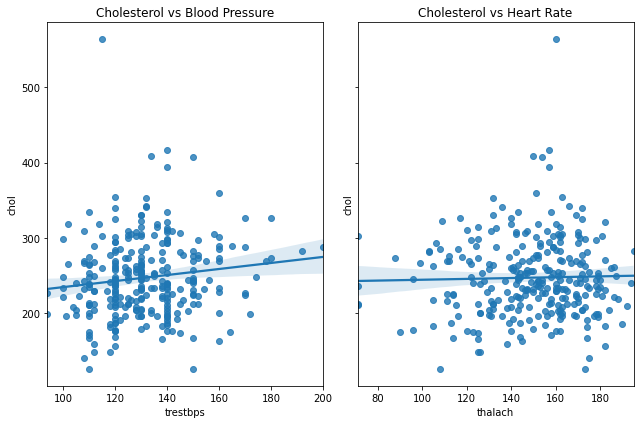

In [46]:
p, axs = plt.subplots(1,2,
                      figsize=(9,6),
                      sharey=True)
# draw 2 scatter plots
sns.regplot(data= heartdf2, x="trestbps", y="chol", ax=axs[0]).set(title='Cholesterol vs Blood Pressure')

sns.regplot(data= heartdf2, y="chol", x="thalach", ax=axs[1]).set(title='Cholesterol vs Heart Rate')
p.tight_layout()

### 12. Visualize the cholesterol level against number of blood vessel blocked for male and female using line plot. Explain the graph base on your observation.

In [47]:

plt.style.use(['ggplot'])

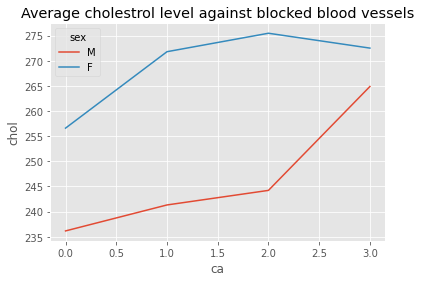

In [48]:
cbs = sns.lineplot(data=heartdf2, x='ca', y='chol',hue='sex', ci=None).set(title="Average cholestrol level against blocked blood vessels")


Females overall has higher average cholestrol levels compared to males, there is a gradual increase in cholesterol levels for 0-2 blocked vessels, and then with 3 blocked vessels, we see a decrease in cholestrol levels for females. This is completely the opposite for males who on average has lower cholestrol levels, but a significant spike in levels can be observed in males who has more than 2 blocked vessels.

### 13. Draw a group bar diagram of heart rate, blood pressure and total number of patients, based on age groups defined in question 9. Explain your observation from the graph.

In [49]:
heartdf2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state,age_bin
0,63,M,tap,145.0,233.0,yes,2,150.0,0,2.3,3,0,6,0,"(60, 70]"
1,67,M,asp,160.0,286.0,no,2,108.0,1,1.5,2,3,3,2,"(60, 70]"
2,67,M,asp,120.0,229.0,no,2,129.0,1,2.6,2,2,7,1,"(60, 70]"
3,37,M,nap,130.0,250.0,no,0,187.0,0,3.5,3,0,3,0,"(30, 40]"
4,41,F,aap,130.0,204.0,no,2,172.0,0,1.4,1,0,3,0,"(40, 50]"


In [50]:
df = pd.pivot_table(heartdf2, values = ['thalach', 'trestbps', 'sex'], index=['age_bin'], aggfunc={'thalach':np.mean, 
                                        'trestbps':np.mean, 'sex':len}).reset_index().rename(columns={'thalach':'Avg Heart Rate', 'trestbps': 'Avg Blood Pressure', 'sex':'Total Patients' })
df

,age_bin,Total Patients,Avg Heart Rate,Avg Blood Pressure
0,"(30, 40]",16,167.062500,125.250000
1,"(40, 50]",73,158.726027,124.082192
2,"(50, 60]",123,148.097561,133.845528
3,"(60, 70]",68,137.544118,136.235294
4,"(70, 80]",6,136.000000,127.833333


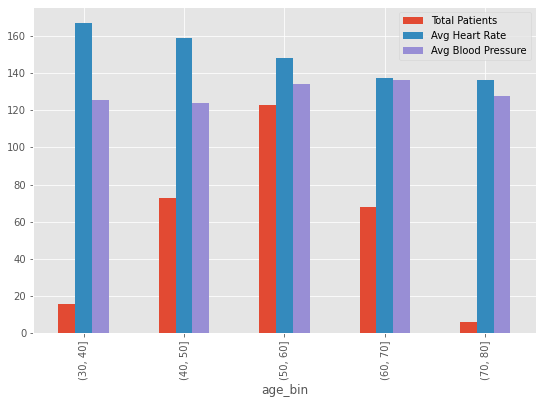

In [51]:
ax = df.plot(x='age_bin', y=['Total Patients', 'Avg Heart Rate', 'Avg Blood Pressure'], kind='bar', figsize=(9,6))



From the chart above, we can observe that individuals between the ages of 30-40 years old has the higest average heart rate, and this gradually decreases as the individuals get older. With the average blood pressure, this is similar for individuals aged between 30-40 and 40-50 years old and then we see a gradual spike in blood pressure in individuals aged 50-60 & 60-70. Interestingly, the average blood pressure rate drops in individuals aged 70-80, this could perhaps be the low number of patients in that age group which has the lowest count, so the data is inconclusive and we are unable to conclude if blood pressure rates decreases in the older individuals. 

### 14. Continue from question 9. Add two more columns named [‘num_male_patients’, ‘num_female_patients’] and having values of the number of male and female patients affected by heart disease in each age group respectively. Save the combined dataset to a csv file named ‘age_group_stat.csv’ in the same directory of your code file.

In [52]:
dfpatient= heartdf2

dfpatient.head()

dfpatient['num_male_patients'] = np.where(dfpatient['sex'] =="M", 1,0)
dfpatient['num_female_patients'] = np.where(dfpatient['sex'] =="F", 1,0)

#test5.to_csv("test5.csv")

In [53]:
agegroupstat = pd.pivot_table(dfpatient, values = ['thalach', 'trestbps', 'chol','num_male_patients','num_female_patients'  ], 
            index=['age_bin'], aggfunc={'thalach':np.mean, 'trestbps':np.mean, 'chol':np.mean,'num_male_patients':np.sum,'num_female_patients':np.sum})

agegroupstat

,chol,num_female_patients,num_male_patients,thalach,trestbps
age_bin,,,,,
"(30, 40]",218.187500,5,11,167.062500,125.250000
"(40, 50]",237.465753,22,51,158.726027,124.082192
"(50, 60]",249.813008,35,88,148.097561,133.845528
"(60, 70]",260.823529,25,43,137.544118,136.235294
"(70, 80]",247.666667,5,1,136.000000,127.833333


In [54]:
agegroupstat.to_csv("age_group_stat.csv")

### 15. Continue from question 1. Replace all the rows where the ‘state’ is null with its immediate previous row. Finally, display and save the resultant dataset to a csv file named ‘clean_data.csv’ in the same directory of your code file.

Using the main dataset rather than the dataset in question 1 where we have filtered to only include observations diagnosed
by a cardiologist, which would mean the dataframe will not have any null values for the variable state

In [55]:
statedf = heartdf
#remove rows where all features are null
statedf = statedf.dropna(how='all')

In [56]:
print(statedf.isnull().sum())

age         0
sex         0
cp          3
trestbps    0
chol        2
fbs         0
restecg     0
thalach     4
exang       0
oldpeak     0
slope       0
ca          4
thal        0
state       2
dtype: int64


In [57]:
statedf[statedf.isnull().any(axis=1)] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
6,62.0,F,NaN,140.0,268.0,no,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3.0
67,54.0,M,nap,150.0,232.0,no,2.0,165.0,0.0,1.6,1.0,0.0,7.0,NaN
115,41.0,M,NaN,135.0,NaN,no,0.0,NaN,0.0,0.0,2.0,NaN,6.0,0.0
116,58.0,M,nap,140.0,211.0,yes,2.0,NaN,0.0,0.0,1.0,0.0,3.0,0.0
132,29.0,M,NaN,130.0,204.0,no,2.0,202.0,0.0,0.0,1.0,0.0,3.0,0.0
165,57.0,M,asp,132.0,207.0,no,0.0,168.0,1.0,0.0,1.0,NaN,7.0,NaN
218,64.0,F,asp,130.0,303.0,no,0.0,NaN,0.0,2.0,2.0,2.0,3.0,0.0
223,53.0,M,asp,123.0,282.0,no,0.0,95.0,1.0,2.0,2.0,NaN,7.0,3.0
228,54.0,M,asp,110.0,NaN,no,2.0,108.0,1.0,0.0,2.0,1.0,3.0,3.0
290,67.0,M,nap,152.0,212.0,no,2.0,NaN,0.0,0.8,2.0,0.0,7.0,1.0


In [58]:
#fill missing value in state with the previous rows state value
statedf['state'].fillna(method = 'ffill',inplace=True)

In [59]:
statedf.to_csv('clean_data.csv', index = False)